<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [13]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.4 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [14]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2024-12-12 18:49:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.5MB/s    in 2.7s    

2024-12-12 18:49:46 (55.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


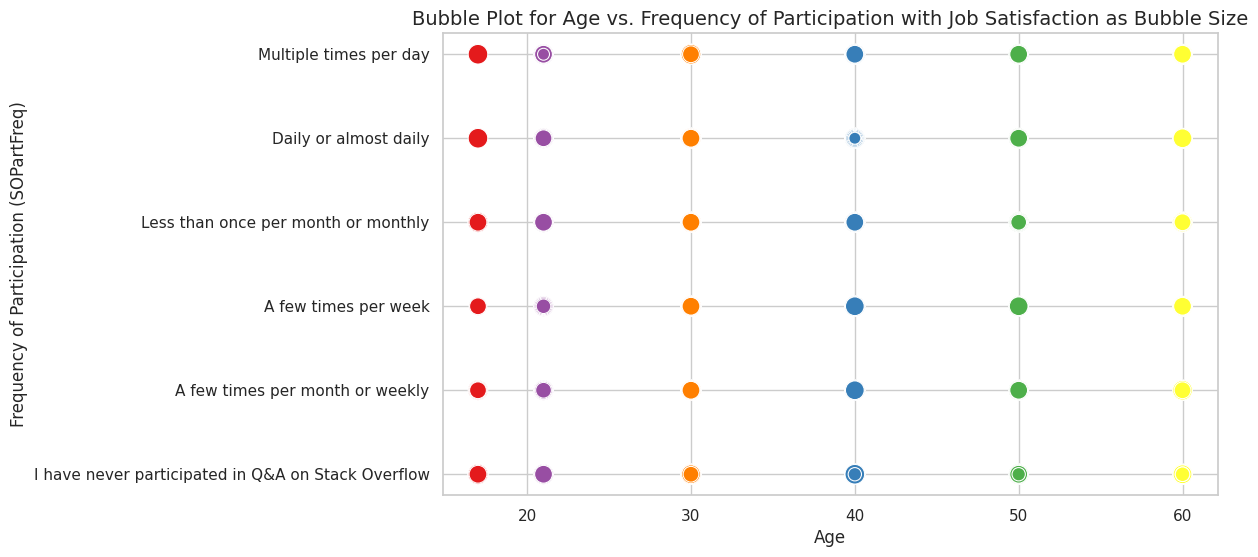

In [15]:
##Write your code here
# Convert Age into numerical values for plotting
import seaborn as sns
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

# Set Seaborn style for the plot
sns.set(style="whitegrid")

# Create the bubble plot
plt.figure(figsize=(10, 6))

# Create scatter plot where size of bubbles is determined by JobSat
sns.scatterplot(x='AgeNumeric', 
                y='SOPartFreq', 
                size='JobSat',  # Size of bubbles determined by job satisfaction
                data=df, 
                hue='Age',  # Color by Age group for better visualization
                palette='Set1',  # Color palette for different age groups
                sizes=(20, 200),  # Bubble size range
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot for Age vs. Frequency of Participation with Job Satisfaction as Bubble Size', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency of Participation (SOPartFreq)', fontsize=12)

# Show the plot
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


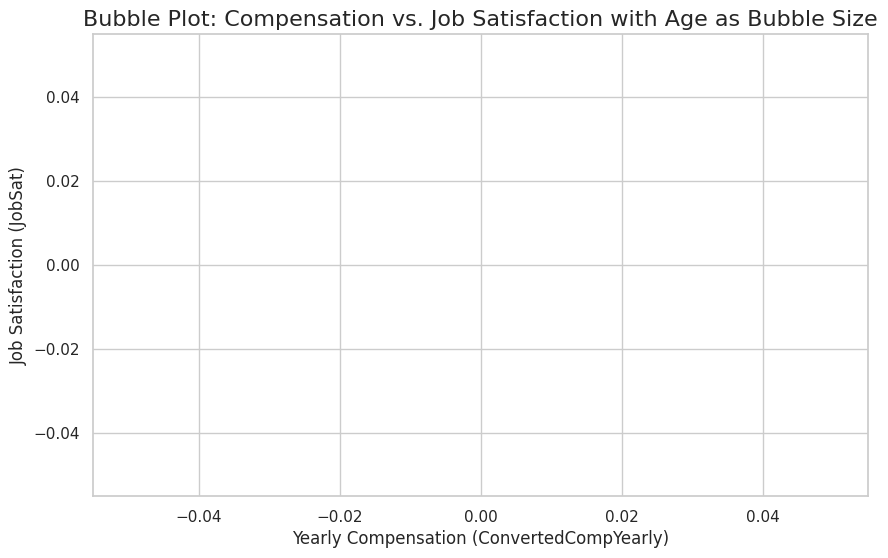

In [24]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'ConvertedCompYearly', 'JobSat', and 'Age' are numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with NaN values in any of the relevant columns
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

# Create the bubble plot
plt.figure(figsize=(10, 6))

# Scatter plot with size representing age
plt.scatter(x=df['ConvertedCompYearly'], 
            y=df['JobSat'], 
            s=df['Age']*10,  # Adjust bubble size factor for clarity
            alpha=0.6, 
            edgecolors="w", 
            linewidth=0.5)

# Adding titles and labels
plt.title('Bubble Plot: Compensation vs. Job Satisfaction with Age as Bubble Size', fontsize=16)
plt.xlabel('Yearly Compensation (ConvertedCompYearly)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSat)', fontsize=12)

# Show the plot
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



/tmp/ipykernel_80/3363438963.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='AgeNumeric',


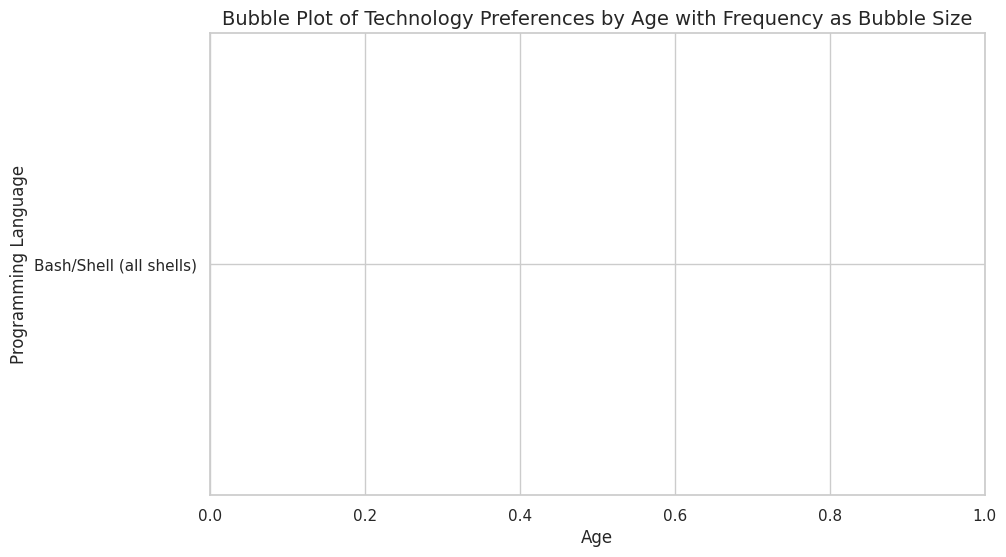

In [19]:
##Write your code here
# Convert 'NA' to NaN
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].replace('NA', pd.NA)

# Step 1: Exploding the 'LanguageHaveWorkedWith' column to create individual rows for each language
df_exploded = df['LanguageHaveWorkedWith'].str.split(';').explode().reset_index()
df_exploded.columns = ['Index', 'Language']

# Step 2: Count the frequency of each language
language_counts = df_exploded['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Step 3: Merge language counts with the original DataFrame
df_exploded = pd.merge(df_exploded, language_counts, on='Language', how='left')

# Step 4: Convert Age into numeric values for plotting
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Merge AgeNumeric directly using the 'Index' from the exploded DataFrame
df_exploded = pd.merge(df_exploded, df[['AgeNumeric']], left_on='Index', right_index=True, how='left')

# Set Seaborn style for the plot
sns.set(style="whitegrid")

# Step 5: Create the bubble plot
plt.figure(figsize=(10, 6))

# Step 6: Create scatter plot where size of bubbles is determined by language frequency
sns.scatterplot(x='AgeNumeric', 
                y='Language', 
                size='Count',  # Size of bubbles determined by language frequency
                data=df_exploded, 
                hue='AgeNumeric',  # Color by AgeNumeric for better visualization
                palette='Set1',  # Color palette for different age groups
                sizes=(50, 500),  # Bubble size range
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot of Technology Preferences by Age with Frequency as Bubble Size', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Programming Language', fontsize=12)

# Show the plot
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


Empty DataFrame
Columns: [Index, Database, Count, JobSatPoints_6]
Index: []


/tmp/ipykernel_80/295424578.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='JobSatPoints_6',


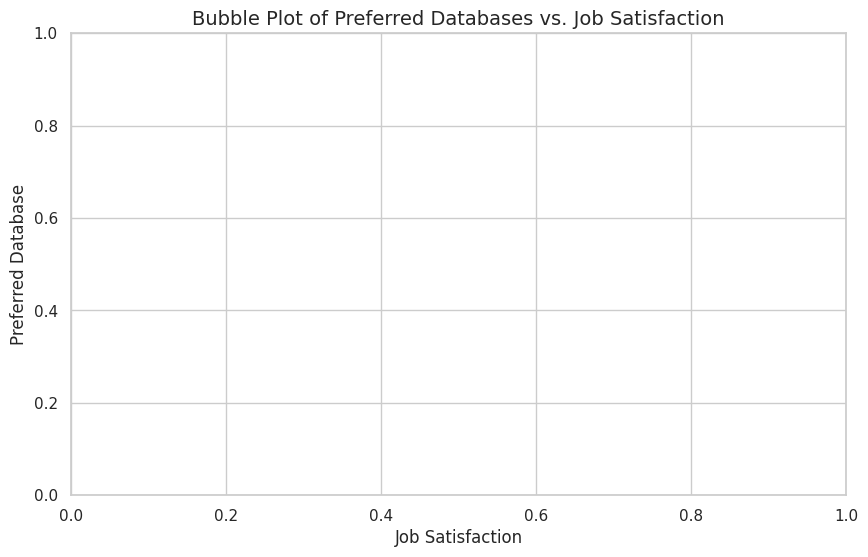

In [25]:
##Write your code here
# Step 1: Clean up 'DatabaseWantToWorkWith' column (replace 'NA' with NaN and handle missing values)
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].replace('NA', pd.NA)

# Step 2: Exploding the 'DatabaseWantToWorkWith' column to create individual rows for each database
df_exploded = df['DatabaseWantToWorkWith'].str.split(';').explode().reset_index()
df_exploded.columns = ['Index', 'Database']

# Step 3: Count the frequency of each database
database_counts = df_exploded['Database'].value_counts().reset_index()
database_counts.columns = ['Database', 'Count']

# Step 4: Merge database counts with the exploded DataFrame
df_exploded = pd.merge(df_exploded, database_counts, on='Database', how='left')

# Step 5: Merge job satisfaction data with the exploded DataFrame (ensure it's on the same index)
df_exploded = pd.merge(df_exploded, df[['JobSatPoints_6']], left_index=True, right_index=True, how='left')

# Step 6: Check merged DataFrame for correctness (optional)
print(df_exploded.head())

# Step 7: Set Seaborn style for the plot
sns.set(style="whitegrid")

# Step 8: Create the bubble plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='JobSatPoints_6', 
                y='Database', 
                size='Count',  # Size of bubbles determined by database frequency
                data=df_exploded, 
                hue='JobSatPoints_6',  # Color by JobSatPoints for better visualization
                palette='coolwarm',  # Color palette for job satisfaction levels
                sizes=(50, 500),  # Bubble size range
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot of Preferred Databases vs. Job Satisfaction', fontsize=14)
plt.xlabel('Job Satisfaction', fontsize=12)
plt.ylabel('Preferred Database', fontsize=12)

# Show the plot
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


/tmp/ipykernel_80/29548347.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ConvertedCompYearly',


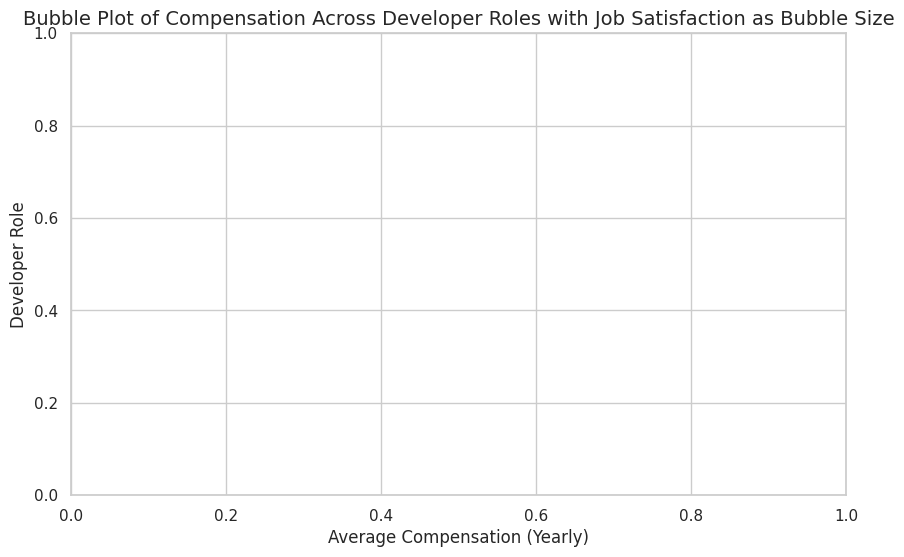

In [26]:
##Write your code here

##Write your code here
# Step 1: Clean up the 'DevType' and 'ConvertedCompYearly' columns
df['DevType'] = df['DevType'].fillna('Unknown')  # Fill missing DevType with 'Unknown' or handle appropriately
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')  # Convert to numeric, handle errors as NaN

# Step 2: Group by 'DevType' and calculate the average compensation for each role
role_compensation = df.groupby('DevType')['ConvertedCompYearly'].mean().reset_index()

# Step 3: Aggregate job satisfaction for each role (optional, could use mean or median job satisfaction)
role_job_satisfaction = df.groupby('DevType')['JobSatPoints_6'].mean().reset_index()

# Step 4: Merge the two DataFrames to have compensation and job satisfaction data together
role_data = pd.merge(role_compensation, role_job_satisfaction, on='DevType', how='left')

# Step 5: Set Seaborn style for the plot
sns.set(style="whitegrid")

# Step 6: Create the bubble plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='ConvertedCompYearly', 
                y='DevType', 
                size='JobSatPoints_6',  # Size of bubbles determined by job satisfaction
                data=role_data, 
                hue='JobSatPoints_6',  # Color by job satisfaction for better visualization
                palette='coolwarm',  # Color palette for job satisfaction levels
                sizes=(50, 500),  # Bubble size range
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot of Compensation Across Developer Roles with Job Satisfaction as Bubble Size', fontsize=14)
plt.xlabel('Average Compensation (Yearly)', fontsize=12)
plt.ylabel('Developer Role', fontsize=12)

# Show the plot
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


/tmp/ipykernel_80/261856672.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='AgeNumeric',


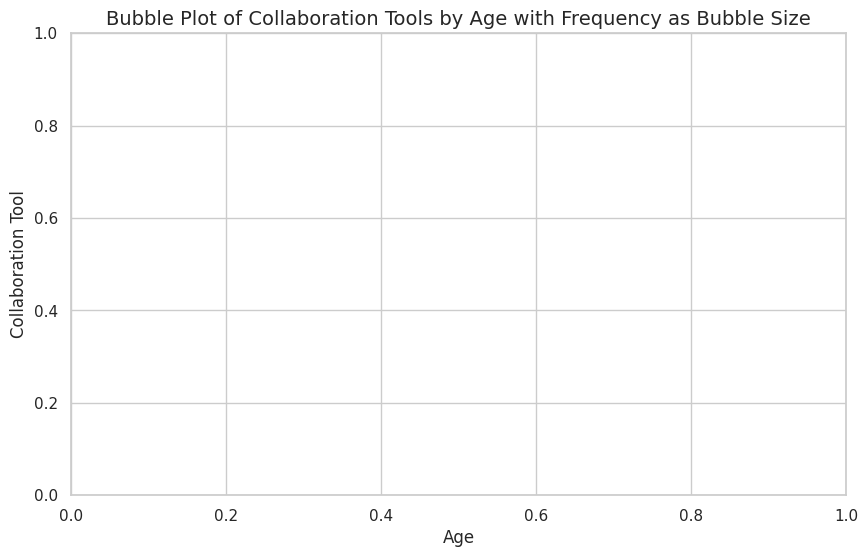

In [27]:
##Write your code here

# Step 1: Handle missing values and clean the 'NEWCollabToolsHaveWorkedWith' column
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].fillna('')  # Replace NaNs with empty string

# Step 2: Exploding the 'NEWCollabToolsHaveWorkedWith' column to create individual rows for each tool
df_exploded = df['NEWCollabToolsHaveWorkedWith'].str.split(';').explode().reset_index()
df_exploded.columns = ['Index', 'Tool']

# Step 3: Count the frequency of each collaboration tool
tool_counts = df_exploded['Tool'].value_counts().reset_index()
tool_counts.columns = ['Tool', 'Count']

# Step 4: Map Age into numeric values for plotting
age_mapping = {
    'Under 18 years old': 17, 
    '18-24 years old': 21, 
    '25-34 years old': 30, 
    '35-44 years old': 40, 
    '45-54 years old': 50, 
    '55-64 years old': 60, 
    '65 years and older': 70
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Step 5: Merge the tool counts with the original dataframe (on the exploded 'Tool' column)
df_exploded = pd.merge(df_exploded, tool_counts, on='Tool', how='left')

# Merge AgeNumeric directly using the 'Index' from the exploded DataFrame
df_exploded = pd.merge(df_exploded, df[['AgeNumeric']], left_on='Index', right_index=True, how='left')

# Step 6: Set Seaborn style for the plot
sns.set(style="whitegrid")

# Step 7: Create the bubble plot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='AgeNumeric', 
                y='Tool', 
                size='Count',  # Size of bubbles determined by tool usage frequency
                data=df_exploded, 
                hue='AgeNumeric',  # Color by AgeNumeric for better visualization
                palette='Set1',  # Color palette for different age groups
                sizes=(50, 500),  # Bubble size range
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot of Collaboration Tools by Age with Frequency as Bubble Size', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Collaboration Tool', fontsize=12)

# Show the plot
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



/tmp/ipykernel_80/400966931.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Index',


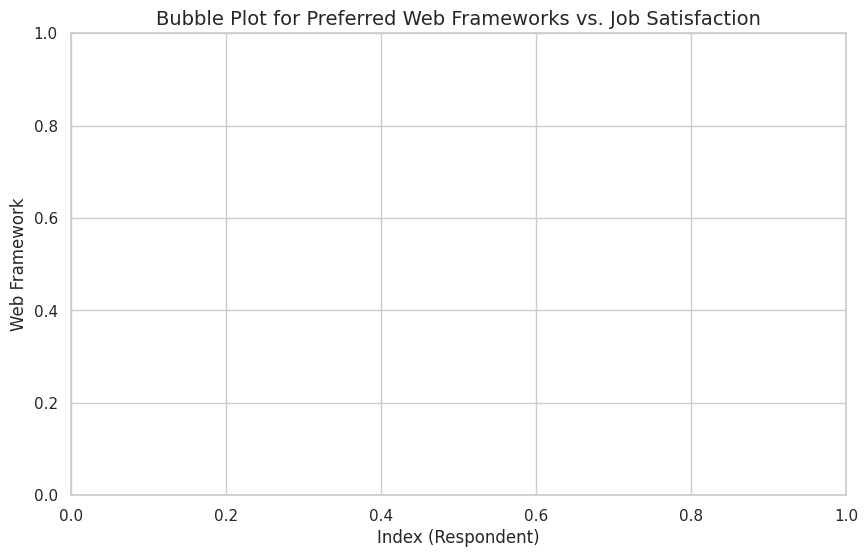

In [28]:
##Write your code here
##Write your code here
# Step 1: Clean the 'JobSat' column by handling missing values (NA)
df['JobSat'] = df['JobSat'].fillna(0)  # You can replace NA with 0 or any other default value

# Step 2: Handle the 'WebframeWantToWorkWith' column (explode frameworks)
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].fillna('')  # Replace NaNs with empty string
df_exploded = df['WebframeWantToWorkWith'].str.split(';').explode().reset_index()
df_exploded.columns = ['Index', 'Framework']

# Step 3: Count the frequency of each web framework
framework_counts = df_exploded['Framework'].value_counts().reset_index()
framework_counts.columns = ['Framework', 'Count']

# Step 4: Merge framework counts with the original DataFrame and map JobSat to numeric values
df_exploded = pd.merge(df_exploded, framework_counts, on='Framework', how='left')
df_exploded = pd.merge(df_exploded, df[['JobSat']], left_on='Index', right_index=True, how='left')

# Step 5: Set Seaborn style for the plot
sns.set(style="whitegrid")

# Step 6: Create the bubble plot for preferred web frameworks vs. job satisfaction
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Index', 
                y='Framework', 
                size='Count',  # Size of bubbles determined by framework frequency
                data=df_exploded, 
                hue='JobSat',  # Color by JobSat for better visualization
                palette='coolwarm',  # Color palette for job satisfaction levels
                sizes=(50, 500),  # Bubble size range
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction', fontsize=14)
plt.xlabel('Index (Respondent)', fontsize=12)
plt.ylabel('Web Framework', fontsize=12)

# Show the plot
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'AgeNumeric'],
      dtype='object', length=115)


/tmp/ipykernel_80/628972137.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Country',


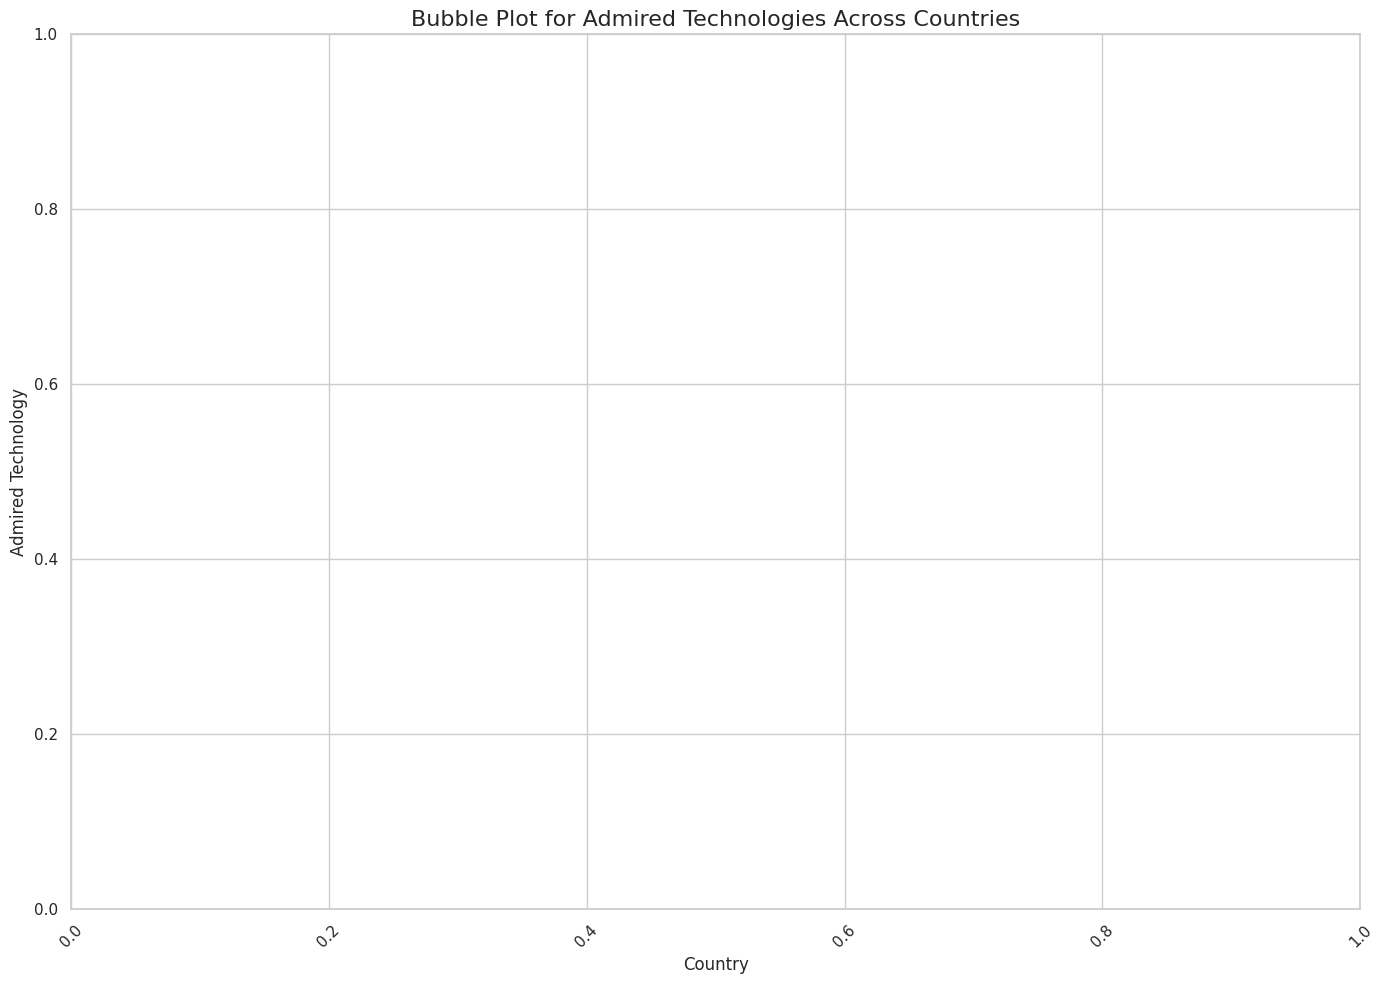

In [29]:
##Write your code here
# Check for the 'Country' column in the original DataFrame
print(df.columns)

# Handle missing or incorrectly named 'Country' column
# Option 1: If 'Country' is missing, we can fill missing values with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

# Exploding the 'LanguageAdmired' column
df['LanguageAdmired'] = df['LanguageAdmired'].fillna('')  # Fill NA values with empty string
df_exploded = df['LanguageAdmired'].str.split(';').explode().reset_index()
df_exploded.columns = ['Index', 'AdmiredTechnology']

# Add 'Country' back to the exploded DataFrame to group by
df_exploded['Country'] = df.loc[df_exploded['Index'], 'Country'].values

# Group by 'AdmiredTechnology' and 'Country' to get the counts
technology_counts = df_exploded.groupby(['AdmiredTechnology', 'Country']).size().reset_index(name='Count')

# Set Seaborn style for the plot
sns.set(style="whitegrid")

# Create the bubble plot
plt.figure(figsize=(14, 10))

sns.scatterplot(x='Country', 
                y='AdmiredTechnology', 
                size='Count',  # Bubble size based on frequency of admiration
                data=technology_counts, 
                hue='Count',  # Color the bubbles based on frequency of admiration
                palette='coolwarm',  # Set color palette
                sizes=(50, 500),  # Range of bubble sizes
                edgecolors='w', 
                legend=False)

# Add labels and title
plt.title('Bubble Plot for Admired Technologies Across Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Admired Technology', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
